<a href="https://colab.research.google.com/github/pablonicolasr/diplodatos-iaa-2022-grupo32/blob/Garay_Carolina_ML1/Lab2_Garay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [72]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [73]:
# Descarga de base de datos
!gdown https://drive.google.com/file/d/1Cjc_gYXA-oHZwhDVnpYMyc6ViR4lQOLU/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1Cjc_gYXA-oHZwhDVnpYMyc6ViR4lQOLU
To: /content/loan_data.csv
100% 138k/138k [00:00<00:00, 69.2MB/s]


In [74]:
dataset = pd.read_csv('/content/loan_data.csv', comment="#")

In [75]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [76]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(1483, 10)
(1483,)
(371, 10)


In [77]:
X_train

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1240,9400,92340.0,125451.0,7.0,0.0,0.0,129.113725,1.0,22.0,36.349975
1183,14800,43983.0,60826.0,4.0,1.0,1.0,113.897967,1.0,9.0,27.108082
692,20100,59726.0,79982.0,8.0,1.0,0.0,74.210759,2.0,28.0,36.846922
871,25200,73168.0,93608.0,9.0,0.0,0.0,151.121480,0.0,21.0,35.590327
1353,17000,70039.0,100993.0,7.0,0.0,0.0,261.911317,1.0,11.0,36.564330
...,...,...,...,...,...,...,...,...,...,...
835,15900,48563.0,64679.0,4.0,0.0,0.0,156.101381,2.0,12.0,27.808547
1216,27500,150666.0,192346.0,3.0,0.0,0.0,177.871473,0.0,17.0,39.978650
1653,12800,54151.0,83828.0,13.0,0.0,0.0,132.160270,0.0,16.0,23.477426
559,21300,63263.0,94180.0,1.0,0.0,0.0,138.348455,1.0,22.0,35.549295


In [78]:
y_train

1240    0
1183    0
692     0
871     0
1353    0
       ..
835     0
1216    0
1653    1
559     0
684     0
Name: TARGET, Length: 1483, dtype: int64

In [79]:
X_test

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
724,4200,50216.0,58541.0,19.0,0.0,0.0,209.871302,0.0,19.0,20.208033
652,19300,50554.0,76140.0,9.0,2.0,0.0,78.276625,3.0,27.0,36.026904
825,13000,78766.0,106450.0,6.0,0.0,0.0,107.951312,0.0,26.0,24.870994
1636,11800,67678.0,108092.0,13.0,0.0,7.0,126.658232,0.0,36.0,37.162690
18,87500,55938.0,86794.0,15.0,0.0,0.0,223.881040,0.0,16.0,36.753653
...,...,...,...,...,...,...,...,...,...,...
485,79100,23553.0,103807.0,25.0,0.0,1.0,142.193458,0.0,13.0,31.469937
1702,16300,79087.0,102921.0,23.0,0.0,0.0,256.253084,0.0,45.0,36.987086
511,26900,72848.0,101736.0,10.0,0.0,0.0,131.409634,0.0,21.0,36.369027
1406,13000,80587.0,110064.0,6.0,0.0,0.0,85.009197,1.0,13.0,33.990040



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos? \
El conjunto de datos corresponde a datos recopilados de solicitantes recientes a los que se les otorgó crédito a través del proceso actual de suscripción de préstamos.
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene? \
La variable objetivo que hay que predecir es "Target", esta es una variable binaria que indica si un solicitante incumplió con los pagos o se encuentra moroso. Esta variable puede tomar dos valores: 0 y 1. El valor 0 significa que el solicitante canceló el préstamo y 1 que el solicitante entró en mora.
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Normalizamos los datos del conjunto de entrenamiento restando la media y dividiendo en la desviación estándar


**CONSULTAR SOBRE COMO NORMALIZAMOS EL CONJUNTO DE VALIDACIÓN**

In [80]:
X_train

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1240,9400,92340.0,125451.0,7.0,0.0,0.0,129.113725,1.0,22.0,36.349975
1183,14800,43983.0,60826.0,4.0,1.0,1.0,113.897967,1.0,9.0,27.108082
692,20100,59726.0,79982.0,8.0,1.0,0.0,74.210759,2.0,28.0,36.846922
871,25200,73168.0,93608.0,9.0,0.0,0.0,151.121480,0.0,21.0,35.590327
1353,17000,70039.0,100993.0,7.0,0.0,0.0,261.911317,1.0,11.0,36.564330
...,...,...,...,...,...,...,...,...,...,...
835,15900,48563.0,64679.0,4.0,0.0,0.0,156.101381,2.0,12.0,27.808547
1216,27500,150666.0,192346.0,3.0,0.0,0.0,177.871473,0.0,17.0,39.978650
1653,12800,54151.0,83828.0,13.0,0.0,0.0,132.160270,0.0,16.0,23.477426
559,21300,63263.0,94180.0,1.0,0.0,0.0,138.348455,1.0,22.0,35.549295


In [81]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

In [82]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.804
Test accuracy: 0.814


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1232
           1       0.14      0.03      0.05       251

    accuracy                           0.80      1483
   macro avg       0.49      0.50      0.47      1483
weighted avg       0.71      0.80      0.75      1483



SGD ajusta un modelo lineal a los datos de entrenamiento

In [85]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       313
           1       0.00      0.00      0.00        58

    accuracy                           0.81       371
   macro avg       0.42      0.48      0.45       371
weighted avg       0.71      0.81      0.76       371



In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)
cmtrain = confusion_matrix(y_train, y_train_pred)
cmtest = confusion_matrix(y_test, y_test_pred)

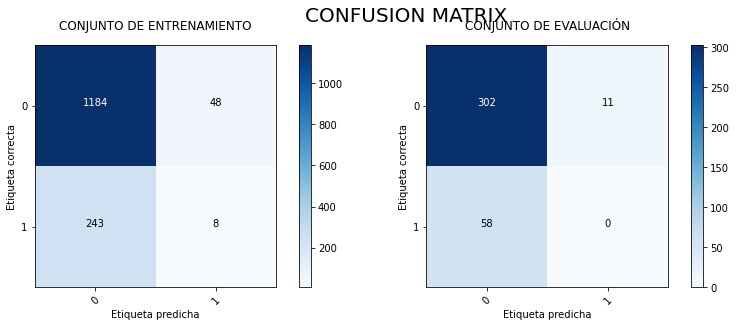

In [87]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4.5))
plt.suptitle('CONFUSION MATRIX', x=0.58, y=1, fontsize=20)

plt.subplot(1, 2, 1)
plot_confusion_matrix(cmtrain, [0, 1])
plt.title('CONJUNTO DE ENTRENAMIENTO', pad=16)

plt.subplot(1, 2, 2)
plot_confusion_matrix(cmtest, [0, 1])
plt.title('CONJUNTO DE EVALUACIÓN', pad=16)
plt.tight_layout(h_pad=5, w_pad=5)

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [136]:

#eta0 = np.logspace(1,-5,8)
eta0 = np.logspace(-5,-2,3)
#alpha = np.logspace(1,-5,8)
alpha = np.logspace(-5,-2,3)
learning_rate = 'constant'

In [137]:
param_grid = {
     'learning_rate': [learning_rate],
        'eta0': eta0,  #tasa de entrenamiento
        'alpha': alpha  #tasa de regularización
}

Mejor conjunto de parámetros para 'hinge (SVM)': {'alpha': 1e-05, 'eta0': 0.01, 'learning_rate': 'constant'}
Best accuracy para 'hinge (SVM)': 0.821
****Reporte de clasificación (SVM) - conjunto de evaluación)*****
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       313
           1       0.40      0.03      0.06        58

    accuracy                           0.84       371
   macro avg       0.62      0.51      0.49       371
weighted avg       0.78      0.84      0.78       371



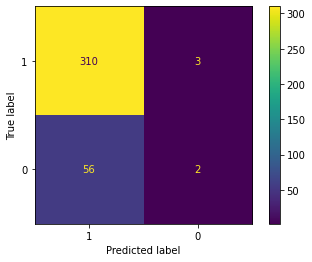

In [153]:
model1 = linear_model.SGDClassifier(random_state=24,loss='hinge',tol=1e-3)
cv1 = GridSearchCV(model1, param_grid, scoring='accuracy', cv=5)
cv1.fit(X_train, y_train)
print("Mejor conjunto de parámetros para 'hinge (SVM)':", cv1.best_params_)
print("Best accuracy para 'hinge (SVM)': %0.03f" % cv1.score(X_train,y_train))
print("****Reporte de clasificación (SVM) - conjunto de evaluación)*****") 
y_true, y_pred = y_test, cv1.predict(X_test)
print(classification_report(y_true, y_pred))
    
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=(1,0))
plt.show()    

In [154]:
#eta0 = np.logspace(1,-5,8)
eta0 = np.logspace(-5,-2,3)
#alpha = np.logspace(1,-5,8)
alpha = np.logspace(-5,-2,3)
learning_rate = 'constant'

In [155]:
param_grid = {
     'learning_rate': [learning_rate],
        'eta0': eta0,  #tasa de entrenamiento
        'alpha': alpha  #tasa de regularización
}

Mejor conjunto de parámetros para 'perceptron': {'alpha': 1e-05, 'eta0': 0.01, 'learning_rate': 'constant'}
Best accuracy para 'perceptron': 0.821
           
****Reporte de clasificación (Perceptron) - conjunto de evaluación)*****
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       313
           1       0.40      0.03      0.06        58

    accuracy                           0.84       371
   macro avg       0.62      0.51      0.49       371
weighted avg       0.78      0.84      0.78       371



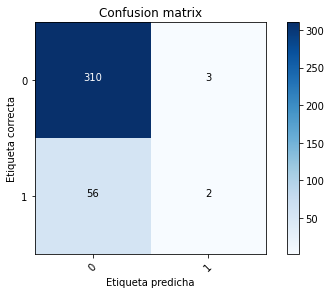

In [156]:
model2 = linear_model.SGDClassifier(random_state=24,loss='perceptron',tol=1e-3)
cv2 = GridSearchCV(model2, param_grid, scoring='accuracy', cv=5)
cv2.fit(X_train, y_train)
print("Mejor conjunto de parámetros para 'perceptron':", cv2.best_params_)
print("Best accuracy para 'perceptron': %0.03f" % cv2.score(X_train,y_train))
print("           ")
print("****Reporte de clasificación (Perceptron) - conjunto de evaluación)*****") 
y_true, y_pred = y_test, cv2.predict(X_test)
print(classification_report(y_true, y_pred))

confusion_matrix(y_true, y_pred)
cmpred = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cmpred,[0, 1])
    

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html